# Data Wrangling Project (WeRateDogs)
## By Zakarea Sabi

###### in this project  I will use skills that I'v learned it throw udacity wragling course 

## Gather

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import re
import os
import json
import time
import warnings
import matplotlib.pyplot as plt

### Twitter archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Image predictions

In [5]:
# get file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# load image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# display few lines
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##  Twitter API

In [7]:
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

twitter_api.columns = ['tweet_id', 'favorites', 'retweets']

twitter_api.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assess

### twitter_archive

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1357,703407252292673536,NaN,NaN,2016-02-27 02:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper doesn't understand gates. 10/10 so...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703407252...,10,10,None,None,None,pupper,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
1440,696886256886657024,NaN,NaN,2016-02-09 02:40:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I found the dog from Up. 12/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696886256...,12,10,None,None,None,None,None
547,805520635690676224,NaN,NaN,2016-12-04 21:14:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke the Wonder Dog. He never let that...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805520635...,13,10,Zeke,None,None,None,None
1158,724049859469295616,NaN,NaN,2016-04-24 01:38:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreggory. He just took a look at his s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724049859...,10,10,Kreggory,None,None,None,None
964,750506206503038976,NaN,NaN,2016-07-06 01:46:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Malcolm. He's absolutely terrified of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750506206...,8,10,Malcolm,None,None,pupper,None
390,826240494070030336,NaN,NaN,2017-01-31 01:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send in any mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826240494...,11,10,None,None,None,None,None
2059,671186162933985280,NaN,NaN,2015-11-30 04:37:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sparky. That's his pancake now. He wil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671186162...,10,10,Sparky,None,None,None,None
772,776477788987613185,NaN,NaN,2016-09-15 17:48:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776477788...,11,10,Huck,None,None,pupper,None
2158,669573570759163904,NaN,NaN,2015-11-25 17:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She just looked up and saw you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669573570...,10,10,Linda,None,None,None,None


In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [12]:
#because always none name words begain with small letter
#I used find lowercase way
none_sense = []
for row in twitter_archive['name']:
    if row[0].islower() and row not in none_sense:
        none_sense.append(row)
print(none_sense)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [13]:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Julio        1
Brian        1
Georgie      1
Jarvis       1
Jett         1
Name: name, Length: 957, dtype: int64

In [14]:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Julio        1
Brian        1
Georgie      1
Jarvis       1
Jett         1
Name: name, Length: 957, dtype: int64

In [15]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [20]:
twitter_archive['text'].value_counts()

This is Griffin. He's desperate for both a physical and emotion connection. 11/10 I'd hug the hell out of Griffin https://t.co/ObWcOEekt0      1
This is Barry. He's very fast. I hope he finds what he's looking for. 10/10 (vid by @KeeganWolfe33) https://t.co/nTAsyvbIiO                    1
This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB    1
Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC                     1
This is Mabel. She's super h*ckin smol. Portable af. Comes with the smol shoe. 12/10 would keep in frocket https://t.co/GGJvxYt3xK             1
                                                                                                                                              ..
This is Cooper. He doesn't know how cheese works. Likes the way it feels on his face. Cheeky tongue slip. 11/10 https://t.co/j1zcz

Image predction

In [21]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [22]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
686,684097758874210310,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,Labrador_retriever,0.627856,True,German_short-haired_pointer,0.173675,True,Chesapeake_Bay_retriever,0.041342,True
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True
124,668237644992782336,https://pbs.twimg.com/media/CUYOl0kW4AAVe_p.jpg,1,chow,0.809320,True,minivan,0.071311,False,Pekinese,0.037870,True
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
1880,846874817362120707,https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg,2,Shetland_sheepdog,0.450539,True,papillon,0.187928,True,collie,0.140068,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
972,706644897839910912,https://pbs.twimg.com/ext_tw_video_thumb/70664...,1,space_heater,0.137871,False,Chihuahua,0.132928,True,cougar,0.113866,False
476,675153376133427200,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,paper_towel,0.327957,False,mailbox,0.096027,False,seat_belt,0.034995,False
1269,749774190421639168,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1,Pekinese,0.879012,True,Chihuahua,0.054855,True,Blenheim_spaniel,0.021041,True


In [23]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
sum(image_prediction.jpg_url.duplicated())

66

In [25]:
sum(image_prediction['tweet_id'].duplicated())

0

## twitter_api

In [26]:
twitter_api.sample(10)

,tweet_id,favorites,retweets
2246,667866724293877760,3172,1110
1127,729463711119904772,6340,2586
2004,672267570918129665,1588,666
331,832769181346996225,0,43
1727,679862121895714818,2678,706
2189,668955713004314625,300,77
538,806576416489959424,5370,2230
2303,666837028449972224,857,584
1255,710296729921429505,2574,833
1136,728035342121635841,4953,1872


In [27]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null int64
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [28]:
sum(twitter_api['tweet_id'].duplicated())

0

## Issues in twitter_archive:
    1-retweeted_status_timestamp is type 'object'
    2-doggo, floofer, pupper, puppo have string none value it should be NaN
    3- there are a lot of names that dont make sense such as 'a', 'all', 'old', 'infuriating', 'the' also 'None'
    I noticed that programticaly also I have noticed that by MS Excel i found 'not' , 'an'
    4-tweet id need to be string

## Clean
#### Code

In [29]:
#solution for issue (1)
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [30]:
#solution for issue (2)
twitter_archive['doggo'].replace('None', 
                        np.nan,
                       inplace = True)
twitter_archive['floofer'].replace('None', 
                        np.nan,
                       inplace = True)
twitter_archive['pupper'].replace('None', 
                        np.nan,
                       inplace = True)
twitter_archive['puppo'].replace('None', 
                        np.nan,
                       inplace = True)

In [31]:
#solution for issue (3) replace it by Nan
twitter_archive['name'].replace(none_sense, 
                        np.nan,
                       inplace = True)
twitter_archive['name'].replace('None', 
                        np.nan,
                       inplace = True)


In [32]:
#solutiion for issue 4
twitter_archive['tweet_id'] =  twitter_archive['tweet_id'].astype(str)

## Test twitter_archive

In [33]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
277,840370681858686976,NaN,NaN,2017-03-11 01:15:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You have been visited by the magical sugar jar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840370681...,13,10,NaN,NaN,NaN,NaN,NaN
1396,699788877217865730,NaN,NaN,2016-02-17 02:54:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Nala. She's a Freckled High Brusc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699788877...,12,10,Nala,NaN,NaN,NaN,NaN
282,839239871831150596,NaN,NaN,2017-03-07 22:22:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He's big. 13/10 would attempt to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839239871...,13,10,Odie,NaN,NaN,NaN,NaN
279,839990271299457024,NaN,NaN,2017-03-10 00:04:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sojourner. His nose is a Fibonacci Spiral...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839990271...,13,10,Sojourner,NaN,NaN,NaN,NaN
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,NaN,pupper,NaN
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,NaN,NaN,NaN,NaN
1011,747439450712596480,NaN,NaN,2016-06-27 14:40:26+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Linus. He just wanted to say hello but...,NaN,NaN,NaN,https://vine.co/v/5uTVXWvn3Ip,12,10,Linus,NaN,NaN,NaN,NaN
2288,667176164155375616,NaN,NaN,2015-11-19 03:02:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667176164...,4,10,NaN,NaN,NaN,NaN,NaN
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,NaN,NaN,NaN,NaN
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,NaN,NaN,NaN,NaN,NaN


In [34]:
twitter_archive['name'].value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Tucker     10
           ..
Monkey      1
Brian       1
Tupawc      1
Clyde       1
Jett        1
Name: name, Length: 931, dtype: int64

In [35]:
twitter_archive['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2356, dtype: object

In [36]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1502 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
dtypes: datetime64[ns, UT

## issues in  Image predictions:

1-there are 66 duplicated urls

2-Image predictions dataset should be emerged with twitter_archive
3- tweet id need change it to string

4- create new culomns named dog_types

In [37]:
image_prediction = image_prediction.drop_duplicates()
image_prediction['tweet_id'] =  image_prediction['tweet_id'].astype(str)
dog_types = []

def image(image_prediction):
    if image_prediction['p1_dog'] == True:
        dog_types.append(image_prediction['p1'])
    elif image_prediction['p2_dog'] == True:
        dog_types.append(image_prediction['p2'])
    elif image_prediction['p3_dog'] == True:
        dog_types.append(image_prediction['p3'])     
    else:
        dog_types.append('none')

image_prediction.apply(image, axis=1)

image_prediction['dog_types'] = dog_types


### test Image predictions

In [38]:
sum(image_prediction.jpg_url.duplicated())
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id     2075 non-null object
jpg_url      2075 non-null object
img_num      2075 non-null int64
p1           2075 non-null object
p1_conf      2075 non-null float64
p1_dog       2075 non-null bool
p2           2075 non-null object
p2_conf      2075 non-null float64
p2_dog       2075 non-null bool
p3           2075 non-null object
p3_conf      2075 non-null float64
p3_dog       2075 non-null bool
dog_types    2075 non-null object
dtypes: bool(3), float64(3), int64(1), object(6)
memory usage: 184.4+ KB


### issues in twitter_api:
1- tweet_id should be string to merge it with the others

In [39]:
 twitter_api['tweet_id'] =  twitter_api['tweet_id'].astype(str)

### test for  twitter_api

In [40]:
 twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null int64
retweets     2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### now all data frames should be emerged to one

In [41]:
twitter1 = pd.merge(twitter_archive,  image_prediction,  on = ['tweet_id'])

twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 29 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns, UTC]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          1397 non-null object
doggo                         80 non-null object
floofer                       8 non-null object
pupper                        222 non-null object
puppo                         24 non-null object
jpg_url                      

In [42]:
twitter = pd.merge(twitter1,  twitter_api,  on = ['tweet_id'])

twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null datetime64[ns, UTC]
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          1396 non-null object
doggo                         80 non-null object
floofer                       8 non-null object
pupper                        221 non-null object
puppo                         24 non-null object
jpg_url                      

In [43]:
twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### Analyzing and Visualizing Data

In [44]:
twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_types,favorites,retweets
1382,684195085588783105,NaN,NaN,2016-01-05 02:09:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684195085...,...,True,toy_terrier,0.121809,True,Boston_bull,0.095981,True,Chihuahua,2108,595
556,787322443945877504,NaN,NaN,2016-10-15 16:01:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787322443...,...,False,golden_retriever,0.105703,True,dingo,0.017257,False,golden_retriever,8726,2032
756,755110668769038337,NaN,NaN,2016-07-18 18:43:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Watson. He trust falls on command. 13/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755110668...,...,True,golden_retriever,0.114314,True,Great_Pyrenees,0.065813,True,Labrador_retriever,23446,12621
877,740365076218183684,NaN,NaN,2016-06-08 02:09:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When the photographer forgets to tell you wher...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740365076...,...,False,Windsor_tie,0.172446,False,mushroom,0.137516,False,none,2727,495
1581,675534494439489536,NaN,NaN,2015-12-12 04:35:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys?! Only send in dogs. I only rat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675534494...,...,True,schipperke,0.133738,True,Newfoundland,0.049914,True,chow,1953,470


In [45]:
twitter.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets
count,2.300000e+01,2.300000e+01,7.900000e+01,7.900000e+01,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000
mean,6.978112e+17,4.196984e+09,7.663364e+17,9.967874e+15,12.265798,10.511819,1.203570,0.594532,1.346665e-01,6.034005e-02,8556.718283,2976.089243
std,4.359384e+16,0.000000e+00,5.882530e+16,8.859637e+16,40.699924,7.180517,0.561856,0.271234,1.006830e-01,5.092769e-02,12098.640994,5054.897526
min,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,16.000000
25%,6.732411e+17,4.196984e+09,7.124037e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,1674.000000,634.000000
50%,6.757073e+17,4.196984e+09,7.798343e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,3864.000000,1408.000000
75%,7.031489e+17,4.196984e+09,8.068680e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,10937.000000,3443.000000
max,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,132810.000000,79515.000000


In [94]:
device = twitter['source'].value_counts().head(10)
device

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Text(0.5, 1.0, 'devices')

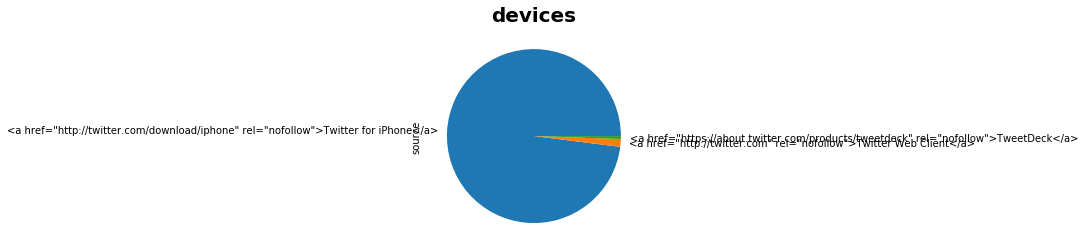

In [97]:
device.sort_values(ascending=False).plot.pie()
plt.title('devices', weight='bold', fontsize=20)

Text(0.5, 0, 'Time')

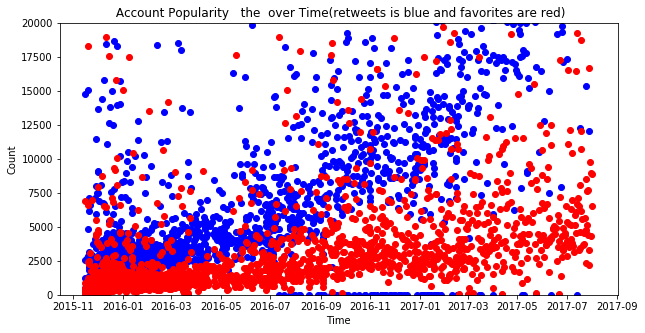

In [64]:
g = pd.DataFrame(twitter.timestamp)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot_date(g,twitter.favorites, color="blue")
ax.plot_date(g,twitter.retweets, color="red")
ax.set_ylim([0,20000])
ax.set_title(' Account Popularity   the  over Time(retweets is blue and favorites are red)')

# Setting labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')


In [47]:
twitter.dog_types.value_counts()

none                  323
golden_retriever      173
Labrador_retriever    113
Pembroke               95
Chihuahua              95
                     ... 
EntleBucher             1
Scotch_terrier          1
silky_terrier           1
Irish_wolfhound         1
clumber                 1
Name: dog_types, Length: 114, dtype: int64

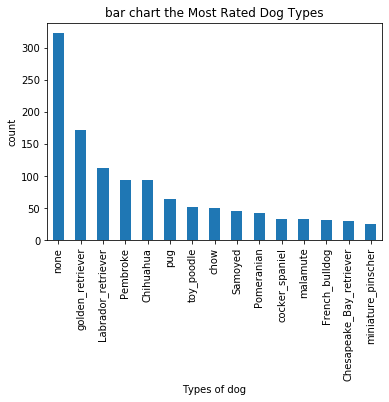

In [88]:
df_dog_type = twitter.groupby('dog_types').filter(lambda x: len(x) >= 25)

df_dog_type['dog_types'].value_counts().plot(kind = 'bar')
plt.title('bar chart the Most Rated Dog Types')
plt.xlabel('Types of dog')
plt.ylabel('count')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [49]:
twitter['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    298
2015-12    367
2016-01    169
2016-02    111
2016-03    121
2016-04     54
2016-05     57
2016-06     81
2016-07     94
2016-08     63
2016-09     71
2016-10     71
2016-11     69
2016-12     61
2017-01     77
2017-02     68
2017-03     53
2017-04     44
2017-05     46
2017-06     46
2017-07     50
2017-08      2
Name: timestamp, dtype: int64

In [105]:
month = twitter['tweet_id'].groupby([twitter['timestamp'].dt.year, twitter['timestamp'].dt.month]).count()
month


timestamp  timestamp
2015       11           298
           12           367
2016       1            169
           2            111
           3            121
           4             54
           5             57
           6             81
           7             94
           8             63
           9             71
           10            71
           11            69
           12            61
2017       1             77
           2             68
           3             53
           4             44
           5             46
           6             46
           7             50
           8              2
Name: tweet_id, dtype: int64

In [106]:
month.mean()

94.22727272727273

C:\Users\zakaria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Time (Year, Month)')

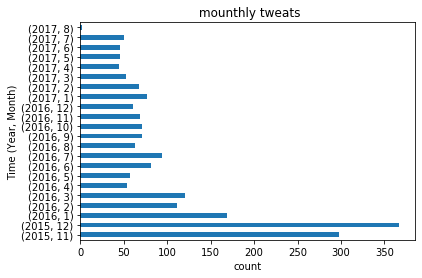

In [101]:
month.plot('barh')
plt.title(' mounthly tweats')
plt.xlabel('count')
plt.ylabel('Time (Year, Month)')